# The Interplay of Compile-time and Run-time Options for Performance Prediction

This notebook follows the order and produce all the figures depicted in the related submission, "The Interplay of Compile-time and Run-time Options for Performance Prediction"

#### First, we import some libraries

In [1]:
# for arrays
import numpy as np

# for dataframes
import pandas as pd

# plots
import matplotlib.pyplot as plt
# high-level plots
import seaborn as sns

# statistics
import scipy.stats as sc
# hierarchical clustering, clusters
from scipy.cluster.hierarchy import linkage, cut_tree, leaves_list
from scipy import stats
# statistical tests
from scipy.stats import mannwhitneyu

# machine learning library
# Principal Component Analysis - determine new axis for representing data
from sklearn.decomposition import PCA
# Random Forests -> vote between decision trees
# Gradient boosting -> instead of a vote, upgrade the same tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier
# Decision Tree
from sklearn.tree import DecisionTreeRegressor, plot_tree
# To add interactions in linear regressions models
from sklearn.preprocessing import PolynomialFeatures
# Elasticnet is an hybrid method between ridge and Lasso
from sklearn.linear_model import LinearRegression, ElasticNet
# To separate the data into training and test
from sklearn.model_selection import train_test_split
# Simple clustering (iterative steps)
from sklearn.cluster import KMeans

# we use it to interact with the file system
import os
# compute time
from time import time

### Import data

In [38]:
data_dir = "../data/"
name_systems = ["x264", "xz", "nodejs", "poppler"]

data = dict()
default_data = dict()
inputs_name = dict()

for ns in name_systems:
    
    data_path = data_dir+ns+'/'
    
    list_dir = os.listdir(data_path)
    list_dir.remove('ctime_options.csv')
    list_dir.remove('default')

    inputs_name[ns] = os.listdir(data_path+list_dir[0])
    inputs = inputs_name[ns]
    
    for j in range(len(inputs)):
        for i in range(len(list_dir)):
            loc = data_path+list_dir[i]+'/'+inputs[j]
            data[ns, list_dir[i], j] = pd.read_csv(loc)
        
        default_data[ns, j] = pd.read_csv(data_path+'default/'+inputs[j])

# RQ1

# RQ1.1

### Compute some boxplot of runtime performances

#### Figure 2a

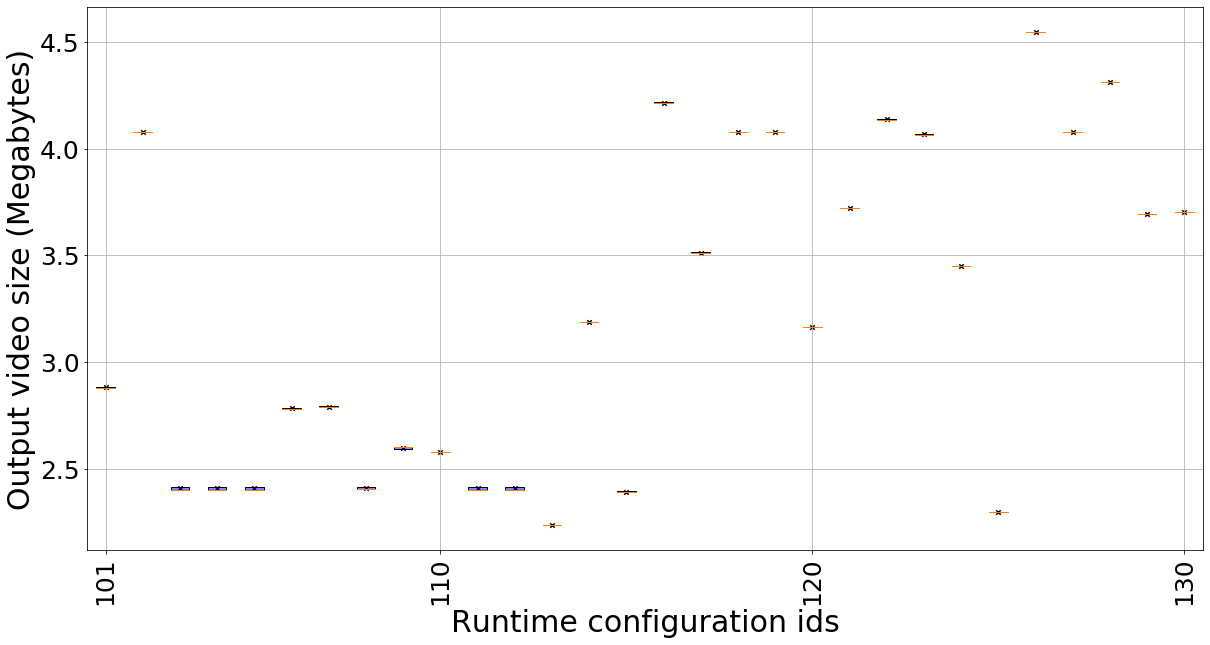

In [3]:
ns ="x264"
dim = "size"
inputs_index = 7

listDim = []
for i in range(len(list_dir)):
    df = data[ns, list_dir[i], inputs_index]
    listDim.append(df[dim]/1e6)

print()

transposed_listDim = []
for i in range(len(listDim[0])):
    transposed_listDim.append([listDim[j][i] for j in range(len(listDim))])


red_square = dict(markerfacecolor='r', marker='s')
plt.figure(figsize=(20,10))
plt.grid()
plt.scatter([k+1 for k in range(30)], [np.mean(l) for l in transposed_listDim[100:130]],
           marker="x", color = "black", alpha = 1, s = 20)
plt.boxplot(transposed_listDim[100:130], flierprops=red_square, 
          vert=True, patch_artist=True, #widths=0.25,
          boxprops=dict(facecolor=(0,0,1,0.5),linewidth=1,edgecolor='k'),
          whiskerprops = dict(linestyle='-.',linewidth=1.0, color='black'))

plt.xticks([k for k in range(1, 31) if k%10==0 or k==1],[k for k in range(101,131) if k%10==0 or k==101], 
           rotation='vertical', size = 25)

#plt.title("x264, Sports video, "+dim, size = 25)
plt.ylabel("Output video size (Megabytes)", size = 30)
plt.xlabel("Runtime configuration ids", size=30)
plt.yticks(size=25)
plt.savefig("../results/boxplot_"+ns+"_"+dim+".png")
plt.show()

In [4]:
np.mean([np.percentile(distr,75)-np.percentile(distr,25) for distr in transposed_listDim])

0.0023844975124377747

In [5]:
np.mean(transposed_listDim)

3.011037094195688

In [6]:
ns ="xz"
dim = "size"
inputs_index = 8

listDim = []
for i in range(len(list_dir)):
    df = data[ns, list_dir[i], inputs_index]
    listDim.append(df[dim]/1e6)

transposed_listDim = []
for i in range(len(listDim[0])):
    transposed_listDim.append([listDim[j][i] for j in range(len(listDim))])
    
np.mean([np.percentile(distr,75)-np.percentile(distr,25) for distr in transposed_listDim])

2.6666666666989396e-06

In [7]:
np.mean(transposed_listDim)

2.8506282

In [8]:
ns ="poppler"
dim = "size"
inputs_index = 8

listDim = []
for i in range(len(list_dir)):
    df = data[ns, list_dir[i], inputs_index]
    listDim.append(df[dim]/1e6)

transposed_listDim = []
for i in range(len(listDim[0])):
    transposed_listDim.append([listDim[j][i] for j in range(len(listDim))])
    
np.mean([np.percentile(distr,75)-np.percentile(distr,25) for distr in transposed_listDim])

1.6218750000171478e-05

In [9]:
np.mean(transposed_listDim)

2.363521454166667

#### Figure 2b

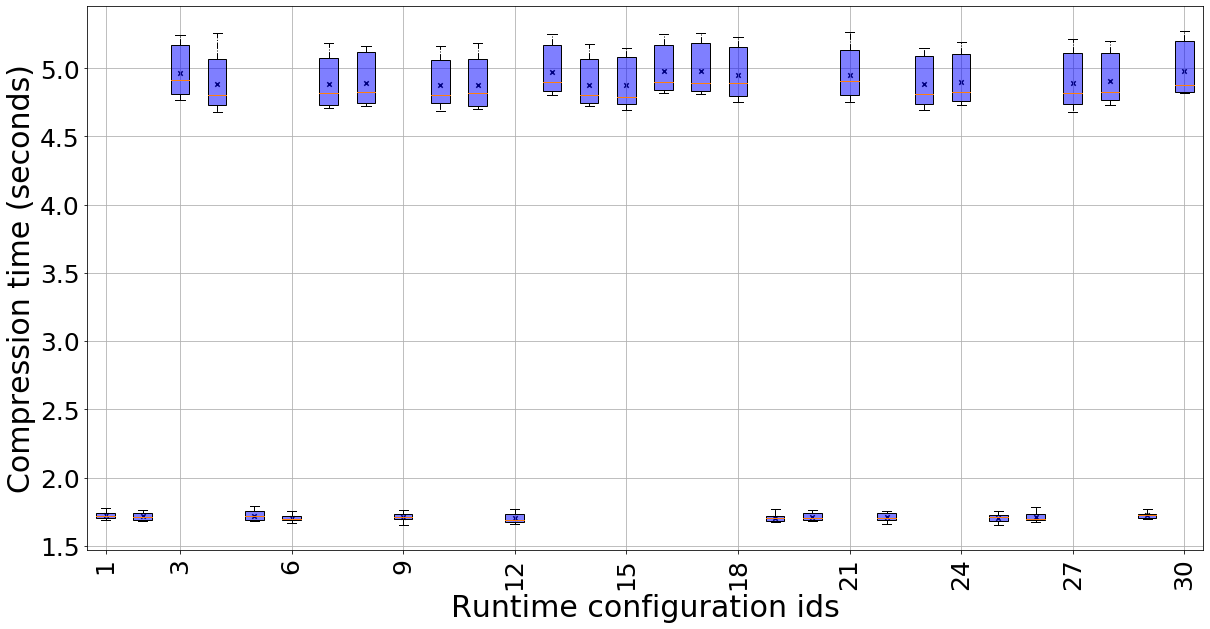

In [10]:
ns ="xz"
dim = "time"
inputs_index = 4

listDim = []
for i in range(len(list_dir)):
    df = data[ns, list_dir[i], inputs_index]
    listDim.append(df[dim])

print()

transposed_listDim = []
for i in range(len(listDim[0])):
    transposed_listDim.append([listDim[j][i] for j in range(len(listDim))])

plt.figure(figsize=(20,10))

#plt.title("xz, Reymont file, "+dim, size = 25)
plt.ylabel("Compression time (seconds)", size = 30)
plt.xlabel("Runtime configuration ids", size = 30)

plt.grid()
plt.scatter([k+1 for k in range(len(transposed_listDim))], [np.mean(l) for l in transposed_listDim],
           marker="x", color = "black", alpha = 1, s = 20)
plt.boxplot(transposed_listDim, flierprops=red_square, 
          vert=True, patch_artist=True, #widths=0.25,
          boxprops=dict(facecolor=(0,0,1,0.5),linewidth=1,edgecolor='k'),
          whiskerprops = dict(linestyle='-.',linewidth=1.0, color='black'))
plt.xticks([k for k in range(1,31) if k%3==0 or k==1],[k for k in range(1,31) if k%3==0 or k ==1], 
           rotation='vertical', size =25)
plt.yticks(size=25)
plt.savefig("../results/boxplot_"+ns+"_"+dim+".png")
plt.show()

In [11]:
ns ="poppler"
dim = "time"
inputs_index = 8

listDim = []
for i in range(len(list_dir)):
    df = data[ns, list_dir[i], inputs_index]
    listDim.append(df[dim])

transposed_listDim = []
for i in range(len(listDim[0])):
    transposed_listDim.append([listDim[j][i] for j in range(len(listDim))])
    
np.mean([np.percentile(distr,75)-np.percentile(distr,25) for distr in transposed_listDim])

0.02884375

In [12]:
np.mean(transposed_listDim)

2.6650833333333335

In [13]:
ns ="xz"
dim = "time"
inputs_index = 4

listDim = []
for i in range(len(list_dir)):
    df = data[ns, list_dir[i], inputs_index]
    listDim.append(df[dim])

transposed_listDim = []
for i in range(len(listDim[0])):
    transposed_listDim.append([listDim[j][i] for j in range(len(listDim))])
    
[np.percentile(distr,75)-np.percentile(distr,25) for distr in transposed_listDim][7]

0.37100000000000044

In [14]:
np.mean(transposed_listDim)

3.63616

#### Figure 2c

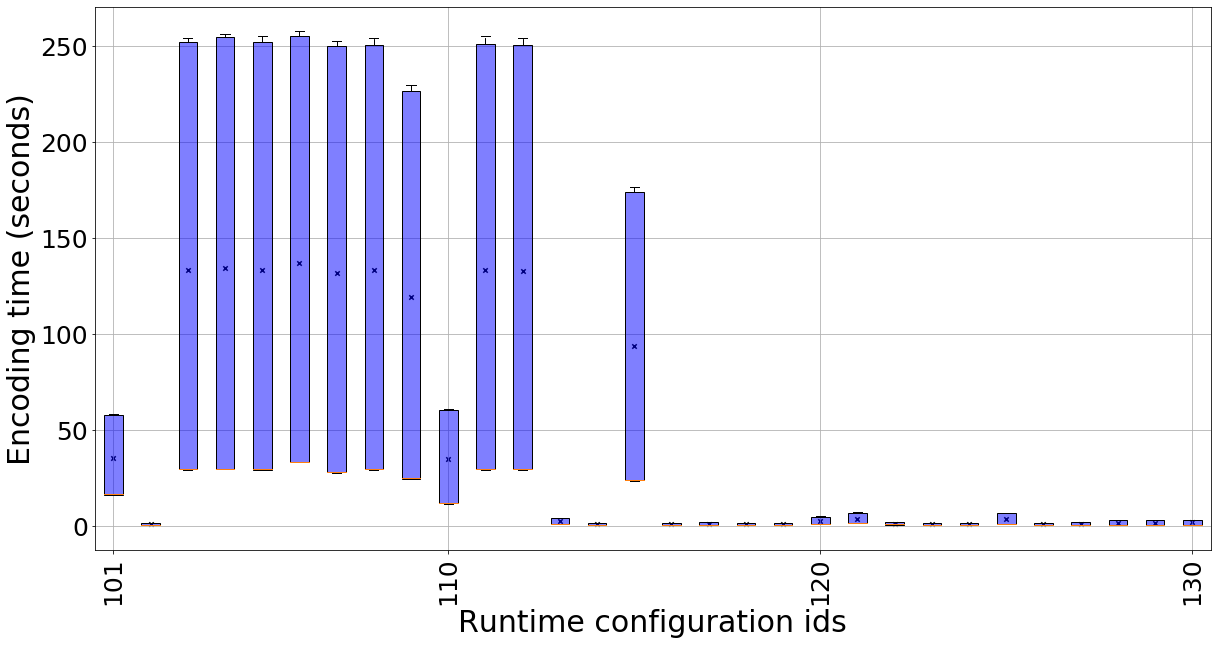

In [15]:
ns ="x264"
dim = "time"
inputs_index = 3

listDim = []
for i in range(len(list_dir)):
    df = data[ns, list_dir[i], inputs_index]
    listDim.append(df[dim])

print()

transposed_listDim = []
for i in range(len(listDim[0])):
    transposed_listDim.append([listDim[j][i] for j in range(len(listDim))])

plt.figure(figsize=(20,10))

#plt.title("x264, Music video, "+dim, size = 30)
plt.ylabel("Encoding time (seconds)", size = 30)
plt.xlabel("Runtime configuration ids", size=30)

plt.grid()
plt.scatter([k+1 for k in range(30)], [np.mean(l) for l in transposed_listDim[100:130]],
           marker="x", color = "black", alpha = 1, s = 20)
plt.boxplot(transposed_listDim[100:130], flierprops=red_square, 
          vert=True, patch_artist=True, #widths=0.25,
          boxprops=dict(facecolor=(0,0,1,0.5),linewidth=1,edgecolor='k'),
          whiskerprops = dict(linestyle='-.',linewidth=1.0, color='black'))

plt.xticks([k for k in range(1, 31) if k%10==0 or k==1],[k for k in range(101,131) if k%10==0 or k==101], 
           rotation='vertical', size = 25)
plt.yticks(size=25)
plt.savefig("../results/boxplot_"+ns+"_"+dim+".png")
plt.show()

In [16]:
[np.percentile(distr,75)-np.percentile(distr,25) for distr in transposed_listDim][100:130]

[41.487,
 1.0354999999999999,
 222.576,
 225.0385,
 222.44150000000002,
 221.7275,
 221.9965,
 221.064,
 201.67749999999998,
 48.3555,
 221.7025,
 220.8805,
 3.377500000000001,
 1.3170000000000002,
 149.8705,
 1.0554999999999999,
 1.5390000000000001,
 1.0150000000000001,
 1.036,
 4.1114999999999995,
 5.3535,
 1.0915,
 1.1985000000000001,
 1.1855000000000002,
 5.6355,
 1.2109999999999999,
 1.6324999999999998,
 2.3255000000000003,
 2.1975,
 2.5575]

In [17]:
[np.mean(distr) for distr in transposed_listDim][100:130]

[35.64046666666666,
 0.8647333333333334,
 133.57020000000003,
 134.48086666666666,
 133.32726666666667,
 137.03093333333337,
 131.67120000000003,
 133.08426666666668,
 119.13879999999999,
 34.69179999999999,
 133.0613333333333,
 132.88333333333335,
 2.5179333333333327,
 1.0794666666666666,
 94.00446666666667,
 0.8967333333333334,
 1.1708666666666667,
 0.8457333333333333,
 0.8632666666666666,
 2.823066666666666,
 3.917400000000001,
 1.3214666666666668,
 0.9680666666666667,
 0.9881333333333334,
 3.7637333333333336,
 0.9596,
 1.1832,
 1.7437999999999998,
 1.7738666666666665,
 1.9347999999999996]

#### Figure 2d

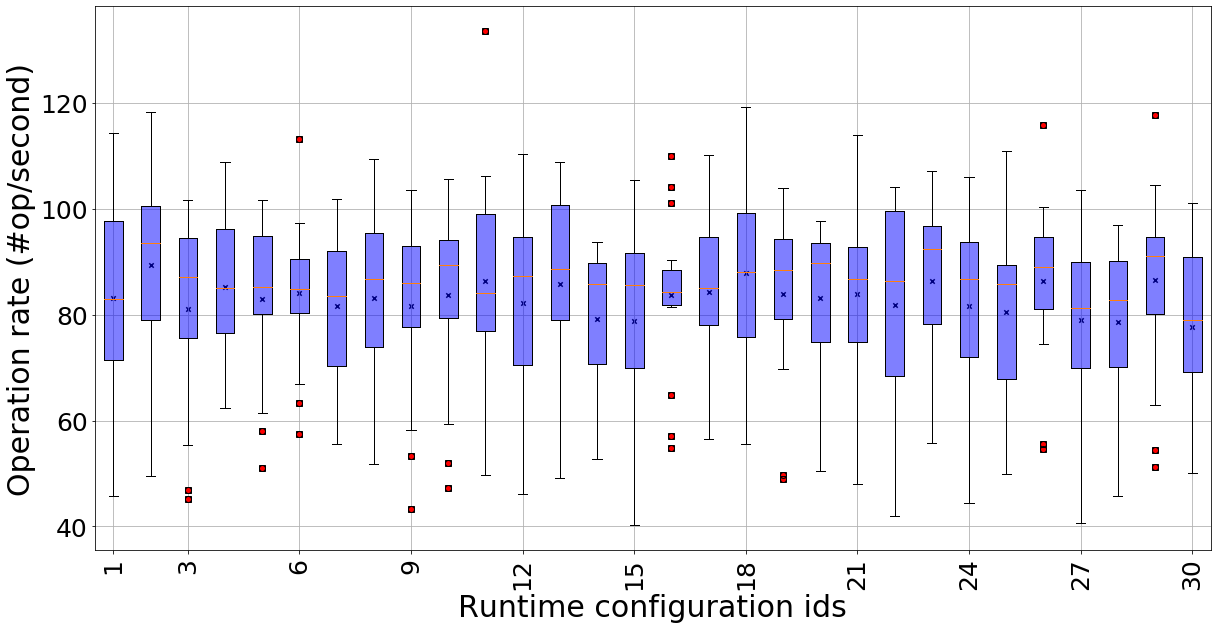

In [18]:
ns ="nodejs"
dim = "ops"
inputs_index = 2

listDim = []
for i in range(len(list_dir)):
    df = data[ns, list_dir[i], inputs_index]
    listDim.append(df[dim])

print()

transposed_listDim = []
for i in range(len(listDim[0])):
    transposed_listDim.append([listDim[j][i] for j in range(len(listDim))])

plt.figure(figsize=(20,10))

#plt.title("nodejs, fsfile script, operation rate", size = 25)
plt.ylabel("Operation rate (#op/second)", size = 30)
plt.xlabel("Runtime configuration ids", size=30)

plt.grid()
plt.scatter([k+1 for k in range(len(transposed_listDim))], [np.mean(l) for l in transposed_listDim],
           marker="x", color = "black", alpha = 1, s = 20)
plt.boxplot(transposed_listDim, flierprops=red_square, 
          vert=True, patch_artist=True, #widths=0.25,
          boxprops=dict(facecolor=(0,0,1,0.5),linewidth=1,edgecolor='k'),
          whiskerprops = dict(linestyle='-.',linewidth=1.0, color='black'))
plt.boxplot(transposed_listDim)
plt.xticks([k for k in range(1,31) if k%3==0 or k==1],[k for k in range(1,31) if k%3==0 or k ==1], 
           rotation='vertical', size =25)
plt.yticks(size=25)
plt.savefig("../results/boxplot_"+ns+"_"+dim+".png")
plt.show()

In [19]:
np.mean([np.percentile(distr,75)-np.percentile(distr,25) for distr in transposed_listDim])

19.165875094818382

In [20]:
np.mean(transposed_listDim)

83.13399220964308

### Do some tests?

# RQ1.2

### Compute the ratio between runtime performances of the compile-time options and the default configuration

#### Table 2a - Average and standard deviation ratios

In [21]:
def get_ratios(name_system, input_index, dim):
    
    list_inputs = inputs_name[name_system]
    
    nb_ctime_configs = len(os.listdir("../data/"+name_system))-2
    
    ratios = []
    
    for i in range(1, nb_ctime_configs+1):
        
        df = data[name_system, str(i), input_index]
        df_def = default_data[name_system, input_index]
        
        ratios.append(df[dim]/df_def[dim])
    
    return (np.round(np.mean(ratios),2), np.round(np.std(ratios),2))

In [22]:
get_ratios("x264", 0, "size")

(1.0, 0.0)

In [23]:
results = dict()

perfs = dict()
perfs["x264"] = ["time", "fps"]
perfs["xz"] = ["time"]
perfs["poppler"] = ["time"]
perfs["nodejs"] = ["ops"]

for ns in name_systems:
    if ns in perfs:
        for p in perfs[ns]:                
            nb_inputs = len(inputs_name[ns])
            for input_index in range(nb_inputs):
                results[ns, input_index+1, p] = get_ratios(ns, input_index, p)

print("\\begin{tabular}{|c|c|c|c|c|c|}")
perfs = sorted(pd.Series([(k[0], k[2]) for k in results.keys()]).unique())
print("\\hline")
print("System")
print("& nodejs")
print("& poppler")
print("& \\multicolumn{2}{|c|}{x264}")
print("& xz")
#for i in range(len(perfs)):
#    print("& "+perfs[i][0])
print("\\\\ \\hline")
print("Perf. $\mathcal{P}$")
for i in range(len(perfs)):
    print("& "+perfs[i][1])
print("\\\\ \\hline")
for i in range(1, 13):
    print("$\mathcal{I}$\\#"+str(i))
    for j in range(len(perfs)):
        if i <= len(inputs_name[perfs[j][0]]):
            if results[perfs[j][0], i, perfs[j][1]]:
                mean_ratios, std_ratios = results[perfs[j][0], i, perfs[j][1]]
                print("& "+str(mean_ratios)+" $\pm$ "+str(std_ratios))
        else:
            print("& \\cellcolor[HTML]{C0C0C0}")
    print("\\\\ \\hline")
print("\\end{tabular}")

\begin{tabular}{|c|c|c|c|c|c|}
\hline
System
& nodejs
& poppler
& \multicolumn{2}{|c|}{x264}
& xz
\\ \hline
Perf. $\mathcal{P}$
& ops
& time
& fps
& time
& time
\\ \hline
$\mathcal{I}$\#1
& 0.8 $\pm$ 0.34
& 1.0 $\pm$ 0.02
& 0.59 $\pm$ 0.4
& 3.33 $\pm$ 2.4
& 1.01 $\pm$ 0.03
\\ \hline
$\mathcal{I}$\#2
& 0.79 $\pm$ 0.36
& 1.0 $\pm$ 0.01
& 0.59 $\pm$ 0.39
& 3.5 $\pm$ 2.53
& 1.16 $\pm$ 0.48
\\ \hline
$\mathcal{I}$\#3
& 0.86 $\pm$ 0.2
& 1.0 $\pm$ 0.01
& 0.59 $\pm$ 0.4
& 3.5 $\pm$ 2.57
& 1.11 $\pm$ 0.32
\\ \hline
$\mathcal{I}$\#4
& 1.01 $\pm$ 0.11
& 1.0 $\pm$ 0.01
& 0.6 $\pm$ 0.39
& 3.26 $\pm$ 2.37
& 1.01 $\pm$ 0.02
\\ \hline
$\mathcal{I}$\#5
& 0.73 $\pm$ 0.41
& 1.0 $\pm$ 0.01
& 0.59 $\pm$ 0.4
& 3.53 $\pm$ 2.62
& 1.02 $\pm$ 0.03
\\ \hline
$\mathcal{I}$\#6
& 1.05 $\pm$ 0.21
& 1.0 $\pm$ 0.02
& 0.6 $\pm$ 0.4
& 3.35 $\pm$ 2.49
& 1.01 $\pm$ 0.02
\\ \hline
$\mathcal{I}$\#7
& 0.98 $\pm$ 0.01
& 1.0 $\pm$ 0.07
& 0.58 $\pm$ 0.4
& 3.75 $\pm$ 2.8
& 1.01 $\pm$ 0.03
\\ \hline
$\mathcal{I}$\#8
& 0.84 $\pm$ 

#### Table 2b - Best ratios (minimal time, and max fps or operation per second)

In [24]:
def get_ratios_indic(name_system, input_index, dim, indic):
    
    list_inputs = inputs_name[name_system]
    
    nb_ctime_configs = len(os.listdir("../data/"+name_system))-2
    
    ratios = []
    
    for i in range(1, nb_ctime_configs+1):
        
        df = data[name_system, str(i), input_index]
        df_def = default_data[name_system, input_index]
        
        ratios.append(df[dim]/df_def[dim])
    
    if indic == "max":
        res = np.round(np.max(ratios), 2)
    if indic == "min":
        res = np.round(np.min(ratios), 2)
    
    return res

results = dict()

perfs = dict()
perfs["x264"] = ["time", "fps"]
perfs["xz"] = ["time"]
perfs["poppler"] = ["time"]
perfs["nodejs"] = ["ops"]

for ns in name_systems:
    if ns in perfs:
        for p in perfs[ns]:
            nb_inputs = len(inputs_name[ns])
            if p == "time":
                for input_index in range(nb_inputs):
                    results[ns, input_index+1, p] = get_ratios_indic(ns, input_index, p, "min")
            else:
                for input_index in range(nb_inputs):
                    results[ns, input_index+1, p] = get_ratios_indic(ns, input_index, p, "max")
                    
print("\\begin{tabular}{|c|c|c|c|c|c|}")
perfs = sorted(pd.Series([(k[0], k[2]) for k in results.keys()]).unique())
print("\\hline")
print("System")
print("& nodejs")
print("& poppler")
print("& \\multicolumn{2}{|c|}{x264}")
print("& xz")
#for i in range(len(perfs)):
#    print("& "+perfs[i][0])
print("\\\\ \\hline")
print("Perf. $\mathcal{P}$")
for i in range(len(perfs)):
    print("& "+perfs[i][1])
print("\\\\ \\hline")
for i in range(1, 13):
    print("$\mathcal{I}$\\#"+str(i))
    for j in range(len(perfs)):
        if i <= len(inputs_name[perfs[j][0]]):
            if results[perfs[j][0], i, perfs[j][1]]:
                print("& "+str(results[perfs[j][0], i, perfs[j][1]]))
        else:
            print("& \\cellcolor[HTML]{C0C0C0}")
    print("\\\\ \\hline")
print("\\end{tabular}")

\begin{tabular}{|c|c|c|c|c|c|}
\hline
System
& nodejs
& poppler
& \multicolumn{2}{|c|}{x264}
& xz
\\ \hline
Perf. $\mathcal{P}$
& ops
& time
& fps
& time
& time
\\ \hline
$\mathcal{I}$\#1
& 1.06
& 0.95
& 1.12
& 0.94
& 0.95
\\ \hline
$\mathcal{I}$\#2
& 1.08
& 0.98
& 1.14
& 0.93
& 0.98
\\ \hline
$\mathcal{I}$\#3
& 1.48
& 0.98
& 1.12
& 0.95
& 0.97
\\ \hline
$\mathcal{I}$\#4
& 1.68
& 0.97
& 1.27
& 0.83
& 0.96
\\ \hline
$\mathcal{I}$\#5
& 1.18
& 0.97
& 1.1
& 0.94
& 0.96
\\ \hline
$\mathcal{I}$\#6
& 2.3
& 0.95
& 1.68
& 0.51
& 0.97
\\ \hline
$\mathcal{I}$\#7
& 1.01
& 0.84
& 1.35
& 0.94
& 0.94
\\ \hline
$\mathcal{I}$\#8
& 2.28
& 0.97
& 1.12
& 0.93
& 0.97
\\ \hline
$\mathcal{I}$\#9
& 1.04
& 0.95
& \cellcolor[HTML]{C0C0C0}
& \cellcolor[HTML]{C0C0C0}
& 0.97
\\ \hline
$\mathcal{I}$\#10
& 1.09
& 0.92
& \cellcolor[HTML]{C0C0C0}
& \cellcolor[HTML]{C0C0C0}
& 0.97
\\ \hline
$\mathcal{I}$\#11
& \cellcolor[HTML]{C0C0C0}
& \cellcolor[HTML]{C0C0C0}
& \cellcolor[HTML]{C0C0C0}
& \cellcolor[HTML]{C0C0C0}
& 0.

# RQ2

# RQ2.1

### Spearman correlogram

In [25]:
# We define a function to plot the correlogram
def plot_correlationmatrix_dendogram(ns, dim):
    # ns : name_system
    # dim : dimension
    # output : a plot of an ordered correlogram of the different compile-time options
    
    # number of videos
    nb_ctime = len(os.listdir(data_dir+ns))-2
    
    for input_index in range(len(inputs_name[ns])):
        
        # matrix of coorelations
        corr = [[0 for x in range(nb_ctime)] for y in range(nb_ctime)]

        for i in range(nb_ctime):
            for j in range(nb_ctime):
                # A distribution of bitrates will have a correlaiton of 1 with itself
                if (i == j):
                    corr[i][j] = 1
                else:
                    # we compute the Spearman correlation between the input video i and the input video j
                    corr[i][j] = sc.spearmanr(data[ns, str(i+1), input_index][dim],
                                              data[ns, str(j+1), input_index][dim]).correlation
                    #corr[i][j] = np.corrcoef(data[ns, str(i+1), input_index][dim],
                    #                                data[ns, str(j+1), input_index][dim])[0,1]
                    

        # we transform our matrix into a dataframe
        df = pd.DataFrame(corr)

        # group the videos, we choose the ward method 
        # single link method (minimum of distance) leads to numerous tiny clusters
        # centroid or average tend to split homogeneous clusters
        # and complete link aggregates unbalanced groups. 
        links = linkage(df, method="ward",)
        order = leaves_list(links)

        # we order the correlation following the aggregation clustering
        mask = np.zeros_like(corr, dtype=np.bool)

        for i in range(nb_ctime):
            for j in range(nb_ctime):
                # Generate a mask for the upper triangle
                if i>j:
                    mask[order[i]][order[j]] = True
        
        g = sns.clustermap(df, cmap="vlag", mask=mask, method="ward",
                       linewidths=0, figsize=(13, 13), #cbar_kws={"ticks":ticks}, 
                       vmin =-1)
        g.ax_heatmap.set_yticklabels([])
        #g.ax_heatmap.set_xticklabels([])
        g.ax_heatmap.tick_params(right=False, bottom=False)
        # abcissa and ordered labels
        g.ax_heatmap.set_xlabel("Compile-time options", fontsize = 18)
        g.ax_heatmap.set_ylabel("Compile-time options", fontsize = 18)
        # we save the figure in the result folder
        plt.savefig("../results/"+ns+"/"+"corr_"+str(input_index+1)+"_"+dim+".png")
        # we show the graph
        plt.show()

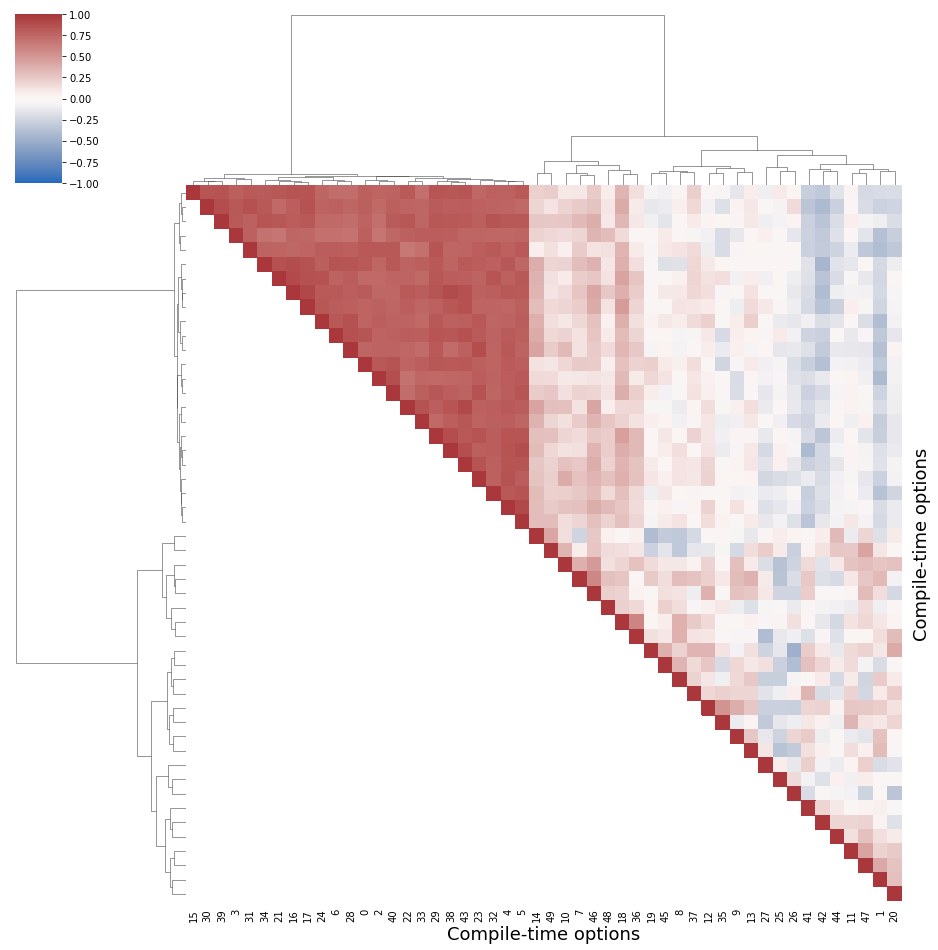

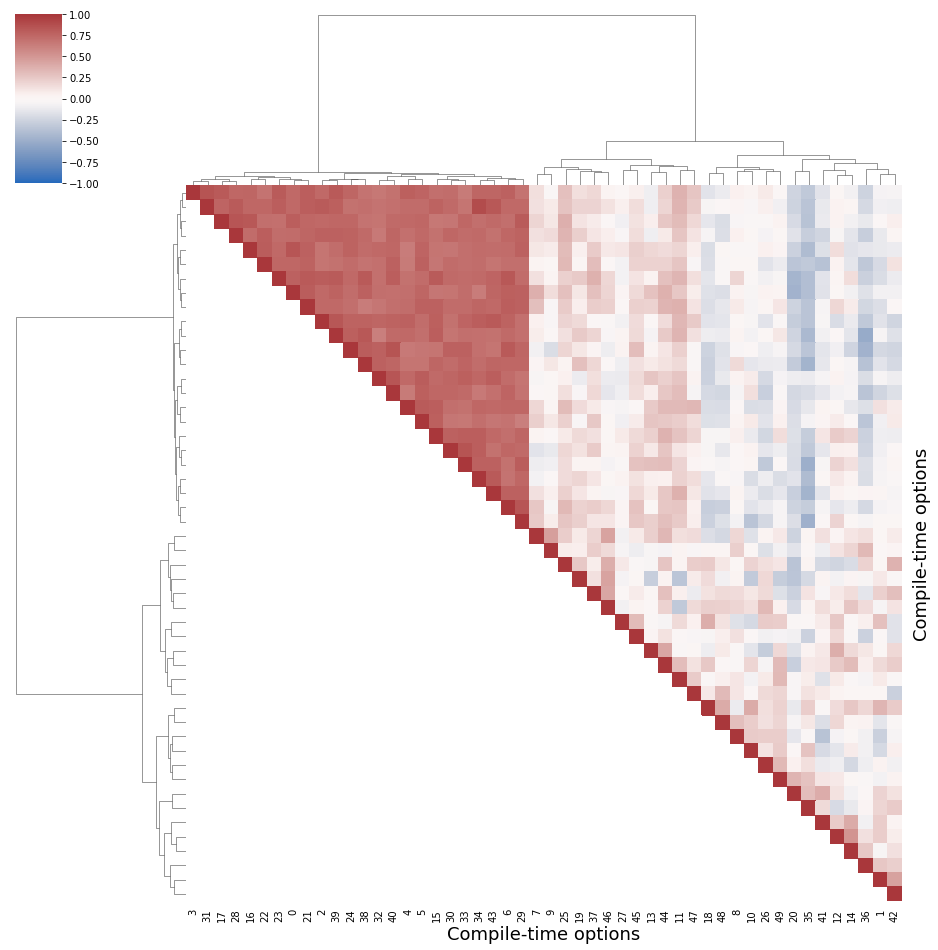

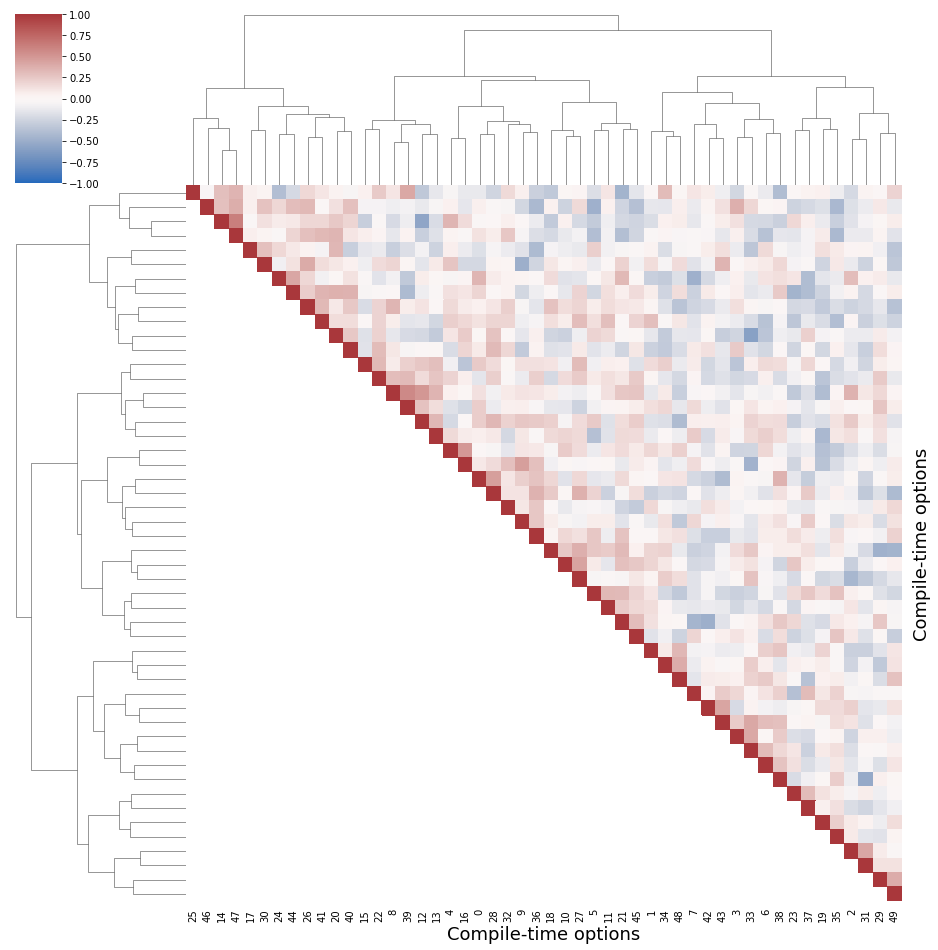

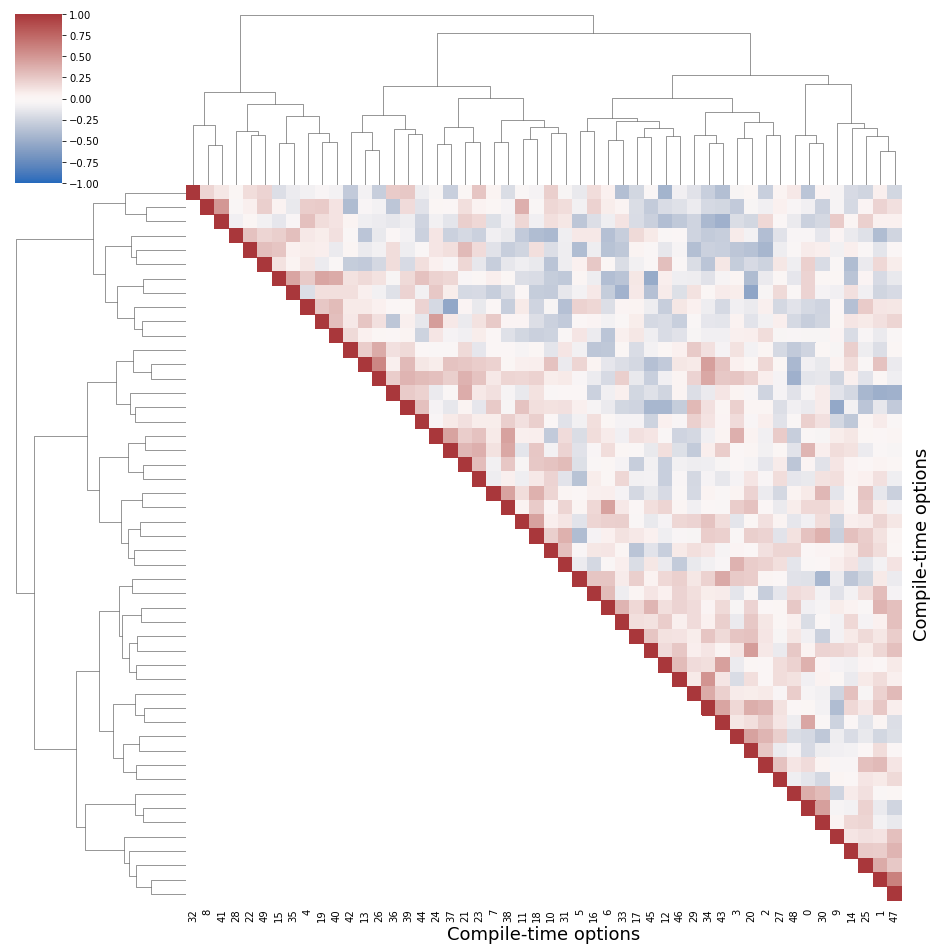

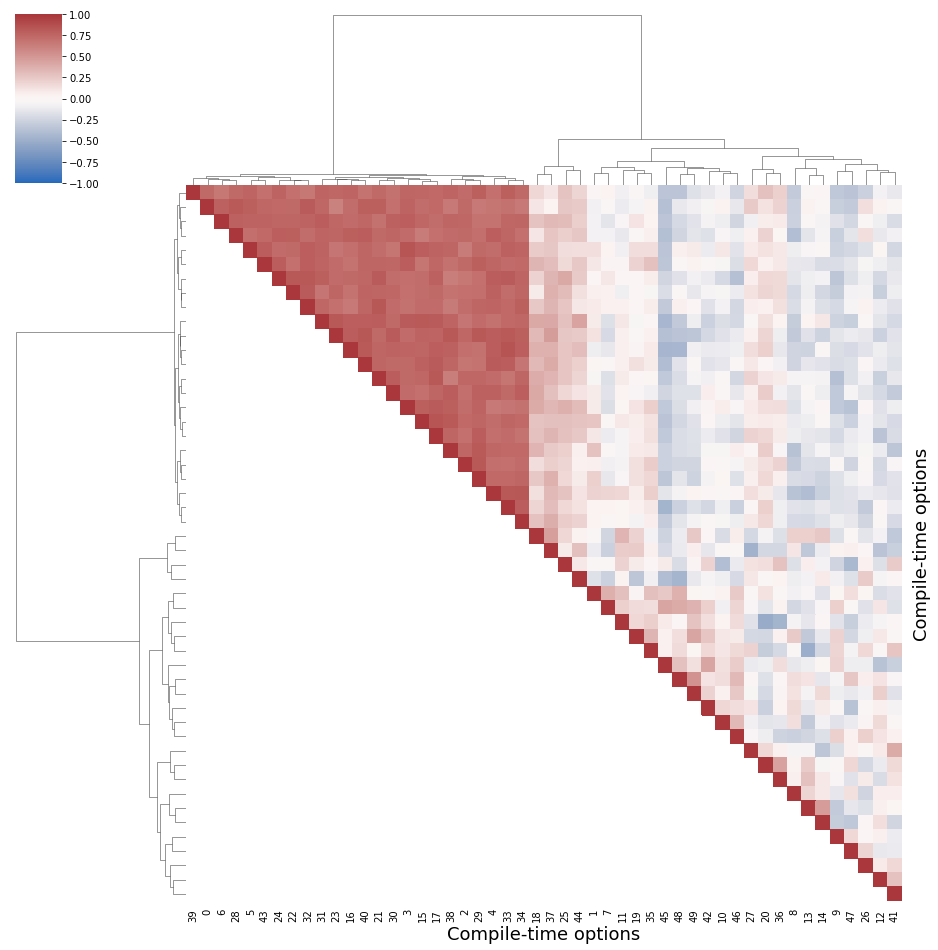

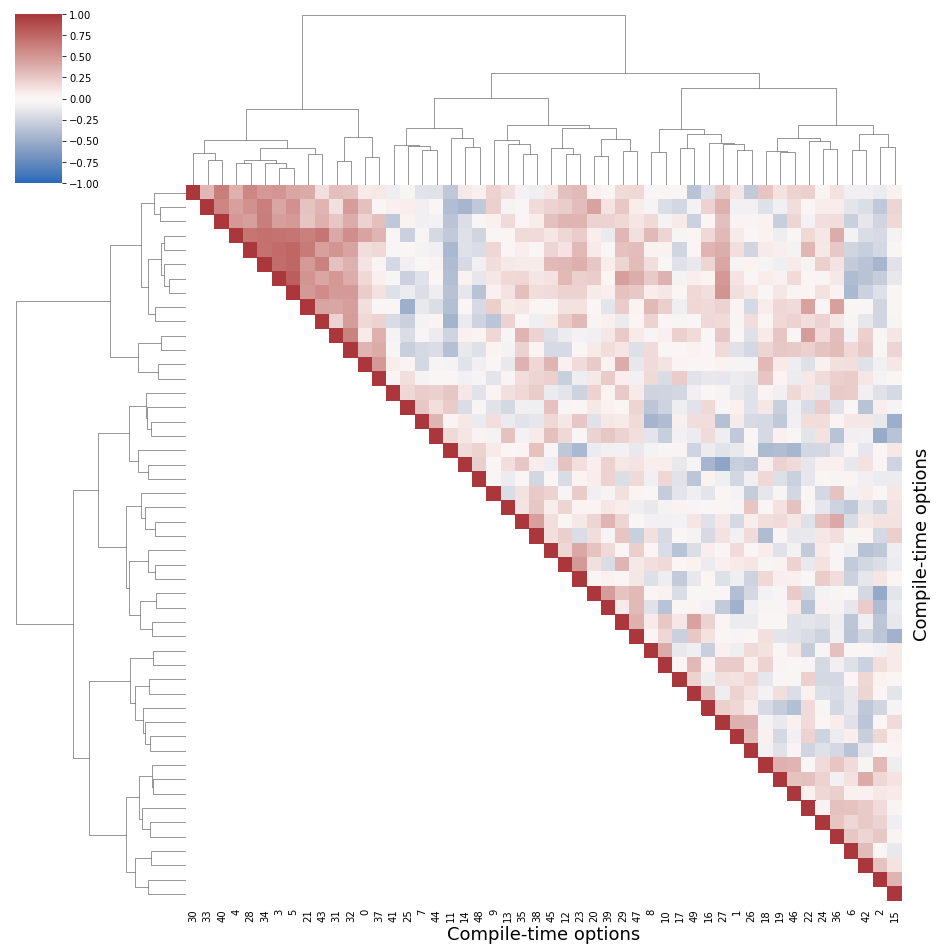

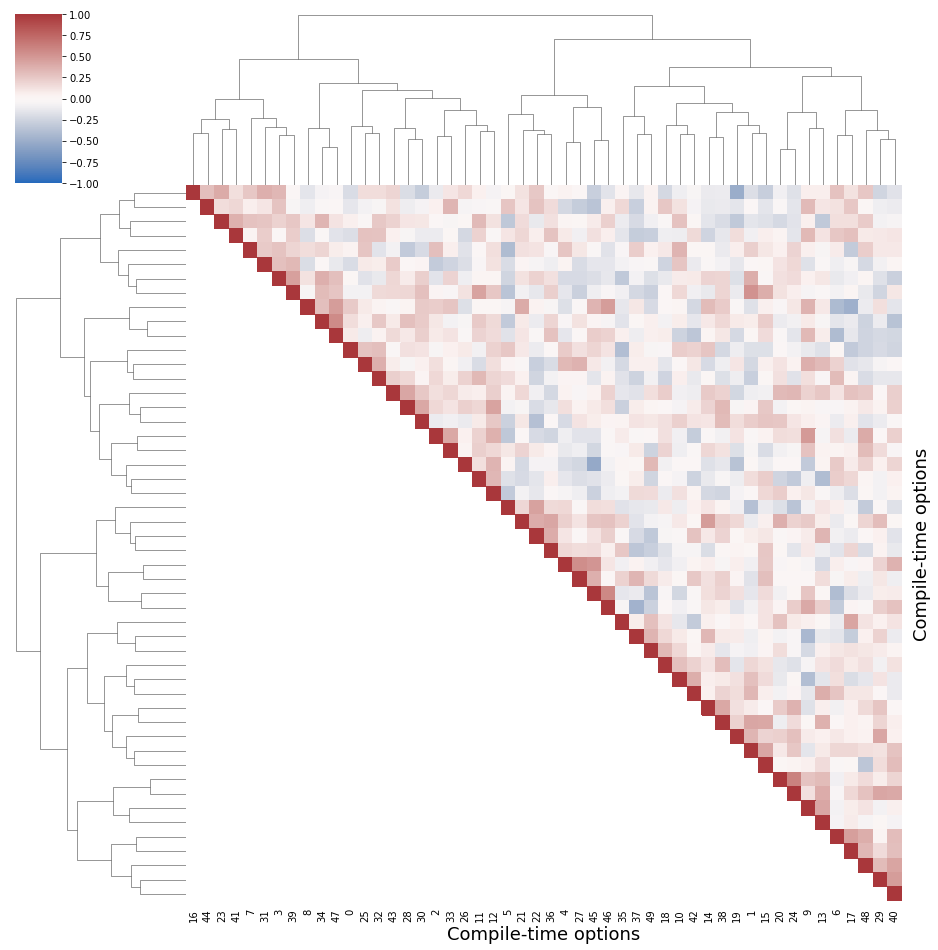

KeyboardInterrupt: 

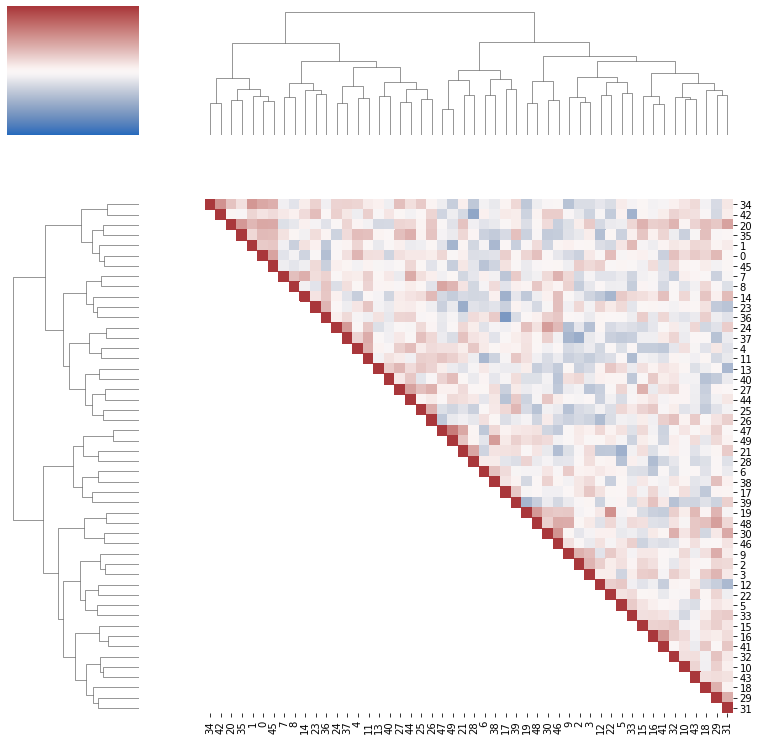

In [26]:
plot_correlationmatrix_dendogram("nodejs", "ops")

In [ ]:
#plot_correlationmatrix_dendogram("x264", "size")
#plot_correlationmatrix_dendogram("xz", "size")
#plot_correlationmatrix_dendogram("poppler", "size")

In [ ]:
ns = "x264"
dim = "time"
input_index = 7

for input_index in range(8):
    # number of videos
    nb_ctime = len(os.listdir(data_dir+ns))-2

    # matrix of correlations
    corr = [[0 for x in range(nb_ctime)] for y in range(nb_ctime)]

    for i in range(nb_ctime):
        for j in range(nb_ctime):
            if (i == j):
                corr[i][j] = 1
            else:
                corr[i][j] = sc.spearmanr(data[ns, str(i+1), input_index][dim],
                                          data[ns, str(j+1), input_index][dim]).correlation

    print(np.min(corr))

In [ ]:
ns = "xz"
dim = "time"

for input_index in range(8):
    # number of videos
    nb_ctime = len(os.listdir(data_dir+ns))-2

    # matrix of correlations
    corr = [[0 for x in range(nb_ctime)] for y in range(nb_ctime)]

    for i in range(nb_ctime):
        for j in range(nb_ctime):
            if (i == j):
                corr[i][j] = 1
            else:
                corr[i][j] = sc.spearmanr(data[ns, str(i+1), input_index][dim],
                                          data[ns, str(j+1), input_index][dim]).correlation

    print(np.min(corr))

In [ ]:
ns = "x264"
dim = "time"

for input_index in range(8):
    # number of videos
    nb_ctime = len(os.listdir(data_dir+ns))-2

    # matrix of correlations
    corr = [[0 for x in range(nb_ctime)] for y in range(nb_ctime)]

    for i in range(nb_ctime):
        for j in range(nb_ctime):
            if (i == j):
                corr[i][j] = 1
            else:
                corr[i][j] = sc.spearmanr(data[ns, str(i+1), input_index][dim],
                                          data[ns, str(j+1), input_index][dim]).correlation

    print(np.min(corr))

In [ ]:
ns = "nodejs"
dim = "ops"
input_index = 9

# number of videos
nb_ctime = len(os.listdir(data_dir+ns))-2

# matrix of correlations
corr = [[0 for x in range(nb_ctime)] for y in range(nb_ctime)]

for i in range(nb_ctime):
    for j in range(nb_ctime):
        if (i == j):
            corr[i][j] = 1
        else:
            corr[i][j] = sc.spearmanr(data[ns, str(i+1), input_index][dim],
                                      data[ns, str(j+1), input_index][dim]).correlation

In [ ]:
np.mean(corr[16][24])

In [ ]:
np.mean(corr[40][23])

In [ ]:
np.mean(corr[27][13])

In [ ]:
np.mean(corr[29][8])

### Binary tree

In [27]:
perfs = dict()

perfs["nodejs"] = ["ops"]
perfs["poppler"] = ["time", "size"]
perfs["x264"] = ["kbs", "fps", "size", "time", "frames"]
perfs["xz"] = ["time", "size"]

def aggregate_data(ns, input_index, dim):
    
    nb_ctime = len(os.listdir(data_dir+ns))-2
    
    ctime_data = pd.read_csv(data_dir+ns+"/ctime_options.csv")
    
    # we delete the other perfs to avoid ocnsidering them as predicting variables
    to_delete_perfs = list(perfs[ns])
    to_delete_perfs.remove(dim)
    to_delete_perfs.append('configurationID')
    
    aggreg_vals = []

    for index_comp in range(nb_ctime):
        
        val = ctime_data.iloc[index_comp][1:]
        
        df_runtime = data[ns, str(index_comp+1), input_index]
        df_runtime = df_runtime.drop(to_delete_perfs, axis = 1)
        
        df_runtime_modif = pd.get_dummies(df_runtime.drop([dim], axis=1))
        df_runtime_modif[dim] = df_runtime[dim]
        
        for rt_config_id in range(df_runtime.shape[0]):
            aggreg_vals.append(list(tuple(val) + tuple(df_runtime_modif.loc[rt_config_id])))
        
    res_df = pd.DataFrame(aggreg_vals)
    res_df.columns = list(tuple(ctime_data.columns[1:]) + tuple(df_runtime_modif.columns))
    
    return res_df

def draw_tree(ns, input_index, dim, max_depth):
    
    res_df = aggregate_data(ns, input_index, dim)

    y = res_df[dim]
    X = res_df.drop([dim], axis=1)

    dt = DecisionTreeRegressor(max_depth = max_depth)
    dt.fit(X,y)

    plt.figure(figsize=(20,20))
    plot_tree(dt, feature_names=res_df.columns, filled=True)
    plt.savefig("../results/"+ns+"/tree_input_"+str(input_index+1)+"_"+dim+".png")
    plt.show()

In [ ]:
for i in range(len(inputs_name["nodejs"])):
    draw_tree("nodejs", i, "ops", 3)

### Feature importances

In [ ]:
def show_imp(ns, input_index, dim, col_names, color):
    
    res_df = aggregate_data(ns, input_index, dim)

    y = res_df[dim]
    X = res_df.drop([dim], axis=1)

    rf = RandomForestRegressor()
    rf.fit(X,y)
    
    res_imp = pd.Series(rf.feature_importances_, res_df.columns[:-1])
    res_imp
    
    plt.figure(figsize = (20,10))
    plt.grid()
    plt.ylabel("Random Forest importance (%)", size = 20)
    plt.yticks(size=15)
    plt.bar(range(len(res_imp.values)), 100*res_imp, color= color)
    if col_names:
        plt.xticks(range(len(res_imp.values)), col_names, rotation=45, size =15)
    else:
        plt.xticks(range(len(res_imp.values)), res_imp.index, rotation=45, size =15)
    plt.savefig("../results/"+ns+"/rf_input_"+str(input_index+1)+"_"+dim+".png")
    plt.show()

In [ ]:
col_node = ['--cross-comp', '--fully-static', '--enable-lto',
       '--ossl-no-asm', '--ossl-is-fips',
       '--eepc', '--wout-intl',
       '--without-ns', '--wout-cache',
       '--en-static', '--v8-lite-m', 'jitless',
       'xp-wasm', 'xp-vm',
       'p-symlinks', 'no-warnings', 'mem-debug']

color = ["salmon"]*11+["darkgreen"]*6

for i in range(len(inputs_name["nodejs"])):
    show_imp("nodejs", i, "ops", col_node, color)

# RQ2.2

In [ ]:
ns = "nodejs"
dim = "ops"

res_rq22 = dict()

#learning rates
lrs = [0.1,0.2,0.5]

for lr in lrs:
    
    for input_index in range(len(inputs_name[ns])):

        res_val = []
        res_val_def = []


            df = aggregate_data(ns, input_index, dim)

            y = df[dim]
            X = df.drop([dim], axis=1)

            y_pred = rf.predict(X_test)

            perf_val = df.iloc[np.argmax(df[dim])][dim]

            res_default = default_data[ns, input_index]
            # [0] = default value
            val_default = res_default[dim][0]


            res_val.append(perf_val/val_mean)
            res_val_def.append(perf_val/val_default)

        #print("Input " + str(input_index) +" : "+ str(np.mean(res_val)))
        res_rq22[str(input_index),lr] = np.mean(res_val_def)

In [53]:
ns = "nodejs"
dim = "ops"

res_rq22 = dict()

#learning rates
lrs = [0.1,0.2,0.5]

for lr in lrs:
    
    for input_index in range(len(inputs_name[ns])):

        res_val = []
        res_val_def = []

        for i in range(10):

            df = aggregate_data(ns, input_index, dim)

            y = df[dim]
            X = df.drop([dim], axis=1)

            X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = lr)

            rf = RandomForestRegressor()
            rf.fit(X_train, y_train)

            y_pred = rf.predict(X_test)

            if np.max(y_train) > np.max(y_pred):
                runtime_values = X_train.iloc[np.argmax(y_train)]
            else:
                runtime_values = X_test.iloc[np.argmax(y_pred)]

            perf_val = df.iloc[runtime_values.name][dim]

            res_default = default_data[ns, input_index]
            # [0] = default value
            val_default = res_default[dim][0]
            val_mean = np.mean(res_default[dim])

            #res_default.columns = ['val'+str(k) for k in range(len(res_default.columns))]
            #for i in range(1,len(res_default.columns)-1):
            #    query_feature = "val"+str(i)+"=="+str(runtime_values[10+i])
            #    res_default = res_default.query(query_feature)


            res_val.append(perf_val/val_mean)
            res_val_def.append(perf_val/val_default)

        #print("Input " + str(input_index) +" : "+ str(np.mean(res_val)))
        res_rq22[str(input_index),lr] = np.mean(res_val_def)

KeyboardInterrupt: 